<a href="https://colab.research.google.com/github/Clinda02/financial_data_analysis/blob/main/stock/PyKrx_com2us_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyKrx
- [documnet](https://github.com/sharebook-kr/pykrx)
- Naver, KRX 주가 정보 스크래핑 데이터 제공
- 국내 상장 주식, 채권, ETF 등 OHLCV, 거래대금, 펀더멘털, 거래 주체 등의 정보 제공


## 설치

In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
pip install pykrx

## 일자별 OHLCV 조회

In [10]:
from pykrx import stock # 주식
from pykrx import bond  # 채권

# 코스닥(KOSDAQ) ticker 조회
tickers = stock.get_market_ticker_list("20241022", 'KOSDAQ')
# print(tickers)

# ticker
for ticker in tickers[-391:-389]:
  print(ticker, stock.get_market_ticker_name(ticker))

078340 컴투스
063080 컴투스홀딩스


In [11]:
# 078340 컴투스 OHLCV 데이터프레임
df = stock.get_market_ohlcv_by_date("20230101", "20241022", "078340")
df.head(3)

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2023-01-02,60300,60600,57300,57500,122151,-3.523490
2023-01-03,57600,59000,56500,58300,124864,1.391304
2023-01-04,57700,60300,57400,59600,103577,2.229846


종목을 입력하세요 : 078340
종목명 : 컴투스


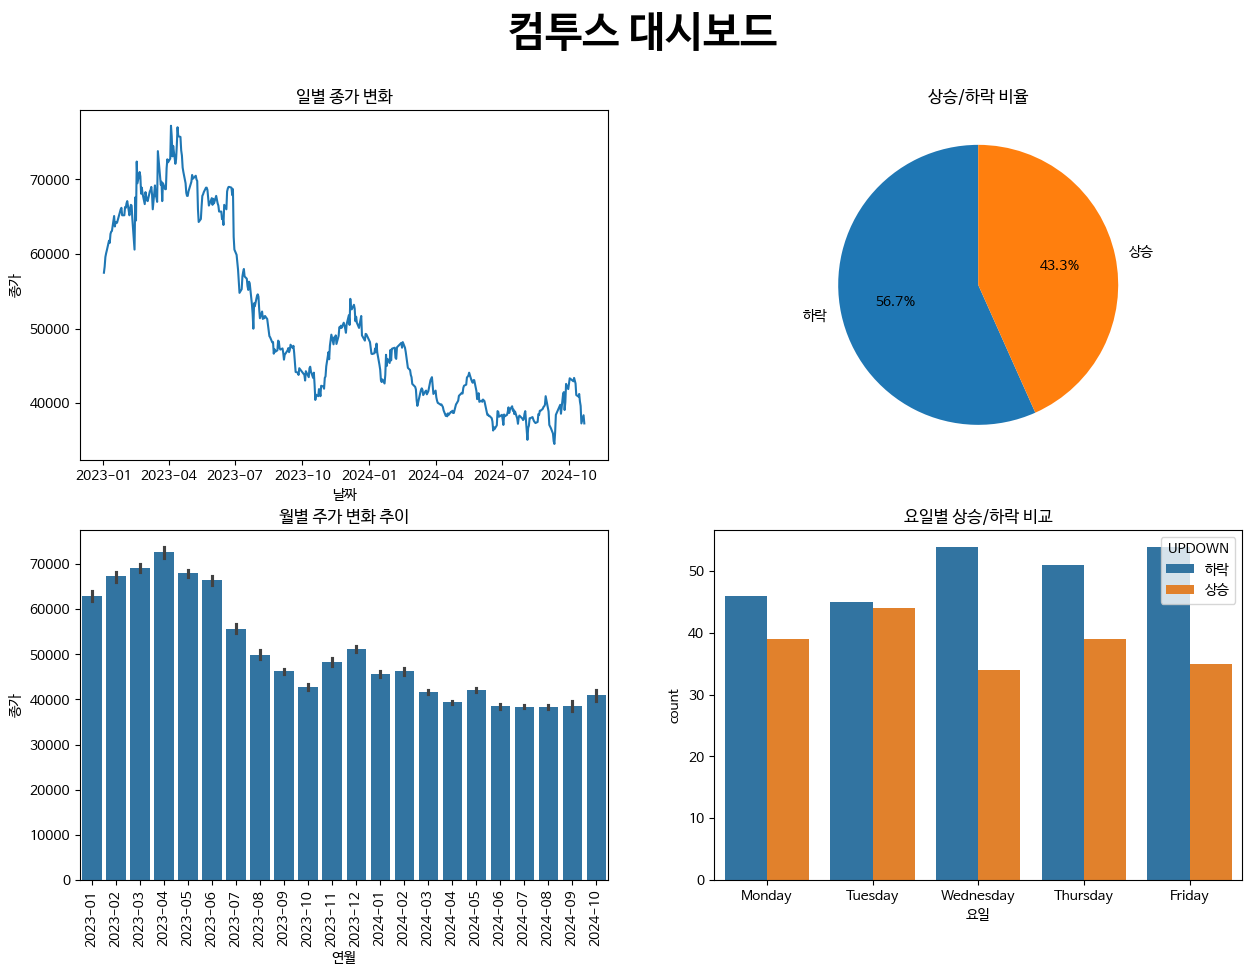

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams["font.family"] = 'NanumGothic'

# 조회할 ticker 입력
ticker = input('종목을 입력하세요 : ') # 078340 컴투스
stock_name = stock.get_market_ticker_name(ticker)
print(f'종목명 : {stock_name}')

df = stock.get_market_ohlcv_by_date("20230101", "20241022", ticker)
# df.head()

# 날짜 형태의 index 데이터타입 변환
df_index= pd.to_datetime(df.index)

# EDA 대상의 칼럼 추가
df['UPDOWN'] = np.where(df['종가'] - df['시가'] > 0, '상승', '하락')
df['연도'] = df.index.year
df['월'] = df.index.month
df['연월'] = df.index.to_period('M')
df['요일'] = df.index.day_name()
df.head()

# 2x2 대시보드 생성
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)

# 2x2 서브플롯 생성
sns.lineplot(data = df, x= df.index, y='종가', ax=ax[0][0])
ax[0][1].pie(df['UPDOWN'].value_counts(), labels=df['UPDOWN'].unique(), autopct='%.1f%%', startangle=90)
sns.barplot(data=df, x='연월', y='종가', ax=ax[1][0])
sns.countplot(data=df, x='요일', hue='UPDOWN', ax=ax[1][1])

# 대시보드 및 서브플롯 제목 설정
plt.suptitle(f'{stock_name} 대시보드', fontsize=30, fontweight='bold')
ax[0][0].set(title="일별 종가 변화")
ax[0][1].set(title="상승/하락 비율")
ax[1][0].set(title="월별 주가 변화 추이")
ax[1][1].set(title="요일별 상승/하락 비교")

# ax[1][0] 서브플롯에만 x축 레이블 회전 적용
ax[1][0].tick_params(axis='x', rotation=90)

In [92]:
# 컴투스 일별 매수/매도 히스토그램


In [92]:
# 주가-거래량 관계 분석 > 산점도

In [ ]:
# 주가 변동 범위 분석 > 히스토그램

## 거래 대금
일자별 거래실적 추이

In [18]:
# 매개변수 3개 필수(start_date, end_date, ticker)
df_volume = stock.get_market_trading_value_by_date("20241021", "20241022", "078340")
df_volume

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2024-10-21,-88749950,-110950,-294593150,383454050,0
2024-10-22,-262681900,375000,496750300,-234443400,0


[Text(0.5, 1.0, '거래원별 상관관계 히트맵')]

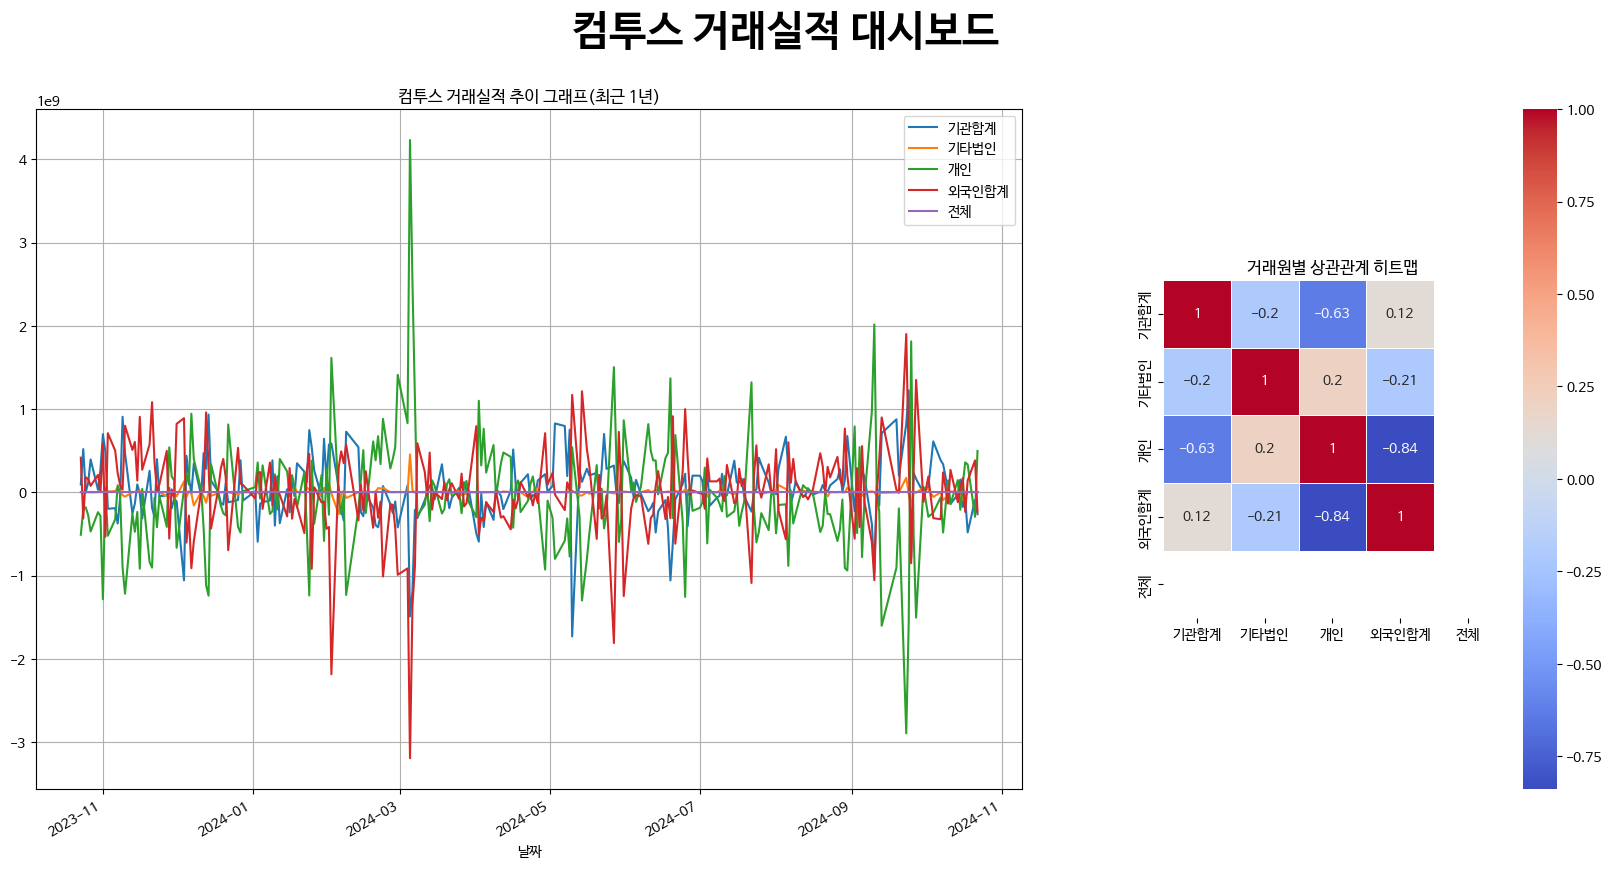

In [8]:
# tiker = input('종목을 입력하세요 : ') # 078340 컴투스

# stock_name = stock.get_market_ticker_name(ticker)
# print(f'종목명 : {stock_name}')

# 일자별 거래실적 추이 (거래대금)
df_volume = stock.get_market_trading_value_by_date("20231022", "20241022", "078340")

# index 데이터타입 datetime 변환
volumne_index = pd.to_datetime(df_volume.index)

# 대시보드 크기 및 제목 생성
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [7, 3]})
fig.set_size_inches(20, 10)
plt.suptitle(f'{stock_name} 거래실적 대시보드', fontsize=30, fontweight='bold')

# 서브플롯 1: 컴투스 거래실적 선 그래프
df_volume.plot(grid=True, ax=ax[0])
ax[0].set(title=f'{stock_name} 거래실적 추이 그래프(최근 1년)')
plt.xlabel('날짜')
plt.ylabel('거래실적')

# 서브플롯 2: 상관관계 히트맵 시각화
corr_matrix = df_volume.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True, ax=ax[1])
ax[1].set(title="거래원별 상관관계 히트맵")

## 여러 개의 종목 OHLCV 수집

In [ ]:
# import time
# for ticker in tickers:
#     df = stock.get_market_ohlcv("20181210", "20181212", ticker)
#     print(df.head()) # 불러온 데이터는 별도의 csv 파일 형태로 저장해두기
#     time.sleep(1)

## 전체 종목 시세 조회

In [ ]:
df_all = stock.get_market_ohlcv("20241022")
df_all.head()

# 두 번째 파라미터에 특정 시장을 지정해서 종목 시세를 조회
# df = stock.get_market_ohlcv("20200831", market="KOSPI")
# df = stock.get_market_ohlcv("20200831", market="KOSDAQ")
# df = stock.get_market_ohlcv("20200831", market="KONEX")

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,4890,4925,4815,4860,168443,822256095,0.31
006840,12530,12770,12530,12730,1186,14993680,1.60
027410,3635,3635,3560,3595,55225,198115135,-0.83
282330,112800,114400,111400,114200,13923,1577390200,0.79
138930,9550,9640,9450,9640,695297,6640638620,0.63


## fundamental

In [ ]:
df_fundamental = stock.get_market_fundamental("20241022")
df_fundamental.head()

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,9326,13.24,0.52,367,5.56,270
006840,44339,4.83,0.29,2635,1.57,200
027410,17286,4.42,0.21,813,3.34,120
282330,62197,10.07,1.84,11337,3.59,4100
138930,31746,5.06,0.30,1905,5.29,510


## ETF

In [ ]:
#ETF 티커 리스트 반환
etf_tickers = stock.get_etf_ticker_list()
etf_tickers[:10]

['470320',
 '466810',
 '457930',
 '487750',
 '445690',
 '465780',
 '442260',
 '159800',
 '472840',
 '361580']

In [ ]:
# ETF 이름 조회
stock.get_etf_ticker_name("470320")

'BNK 24-11 회사채(AA-이상)액티브'